In [ ]:
pip install -U  scikit-learn 

     |████████████████████████████████| 6.9MB 2.8MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [ ]:
https://www.ritchieng.com/machine-learning-project-titanic-survival/

In [ ]:
import pandas as pd
import numpy as np 

In [ ]:
df=pd.read_csv("https://bit.ly/kaggletrain")

In [ ]:
# si\e of the dataset
df.shape

(891, 12)

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Missing values


In [ ]:
# Dataset info 


In [ ]:
#  Display Categories.  (Embarked)


In [ ]:
# select 4 features 
df[["Survived", "Pclass", "Sex", "Embarked"]]

In [ ]:
df=df[["Survived", "Pclass", "Sex", "Embarked"]] # df.loc[df.Embarked.notna(), ["Survived", "Pclass", "Sex", "Embarked"]]

In [ ]:
#df.isna().sum()

Survived    0
Pclass      0
Sex         0
Embarked    2
dtype: int64

In [ ]:
# Set. X and y   datasets
X, y =df.drop("Survived", 1), df.Survived 

In [ ]:
#Dispaly samples
#X.sample(3)

In [ ]:
# Split Data
X_train, 

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer 
from sklearn.compose import  make_column_selector  as selector
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
  
# num_pipeline 4  Standarscaler
.....


# Cat_pipeline =>   Simple imputer &.  OneHotEncoder
cat_pipeline=make_pipeline(

)

preprocess= make_column_transformer(


)

In [ ]:
# preprocess. fit_transform 


# Models

## SVC Model

In [ ]:
from sklearn.svm import SVC 
model_SVC=make_pipeline(
    preprocess,
    SVC(probability=True)

)

In [ ]:
model_SVC.fit(X_train, y_train)

In [ ]:
model_SVC.score(X_test, y_test)

0.8

## Prediction 

In [ ]:
y_pred=model_SVC.predict(X_test)

## Metrics 

![](https://keytodatascience.com/wp-content/uploads/2019/09/values-3.jpg)

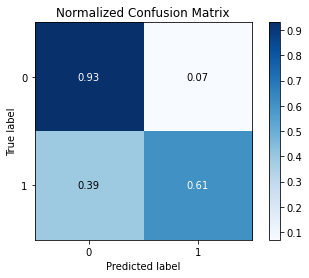

In [ ]:
#  Confusion Matrix
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)

In [ ]:
y_probas = model_SVC.predict_proba(X_test)
y_probas[:3]

array([[0.79775825, 0.20224175],
       [0.79775655, 0.20224345],
       [0.79790676, 0.20209324]])

In [ ]:
from sklearn import metrics 
#Accuracy
f"{metrics.accuracy_score(y_test, y_pred):.2%}"

'80.00%'

- model.score(X_test, y_test) calls accuracy_score of sklearn.metrics for classifier. For regressor, it calls r2_score, which is the coefficient of determination defined in the statistics course.

In [ ]:
# MAE
metrics.recall_score(y_test, y_pred)

0.584070796460177

In [ ]:
# MSE
f"{metrics.precision_score(y_test, y_pred):.2%}"

'91.67%'

## LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression
model_Lgr=make_pipeline(
    preprocess,
    LogisticRegression()

)

In [ ]:
model_Lgr.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fe9fd1580b8>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(drop='if_binary'))]),
                                                  <sklearn.compose._column_transforme

In [ ]:
def pred(md , X_test, y_tes , md_nm):
  from sklearn import metrics
  y_pres=md.predict(X_test)

  print(f"Model :{md_nm:-<20} \n")
  print(f"Model Score {md.score(X_test, y_test )}")
  print(f"Model accuracy {metrics.accuracy_score(y_test, y_pred)}")
  print(f"Model Recall Score {metrics.recall_score(y_test, y_pred)}")
  print(f"Model Precision  Score {metrics.precision_score(y_test, y_pred)} \n")

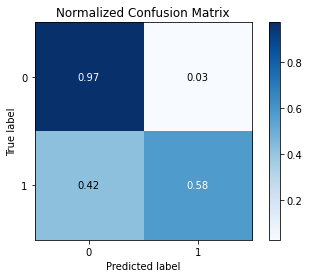

In [ ]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)

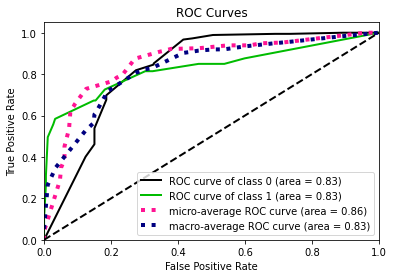

In [ ]:
y_probas= model_Lgr.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas)

In [ ]:
pred(model_Lgr,  X_test , y_test, "Logisticregression")

Model :Logisticregression-- 

Model Score 0.7830508474576271
Model accuracy 0.5661016949152542
Model Recall Score 0.30973451327433627
Model Precision  Score 0.4117647058823529 



In [ ]:
pred(model_SVC,  X_test , y_test, "SVC")


Model :SVC----------------- 

Model Score 0.8203389830508474
Model accuracy 0.5661016949152542
Model Recall Score 0.30973451327433627
Model Precision  Score 0.4117647058823529


## RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_RDFC=make_pipeline(
    preprocess,
   RandomForestClassifier(n_estimators=5, max_depth=5, random_state=42)

)


In [ ]:
model_RDFC.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fe9fd1580b8>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(drop='if_binary'))]),
                                                  <sklearn.compose._column_transforme

In [ ]:
pred(model_RDFC,  X_test , y_test, "RandomForestClassifier")

Model :RandomForestClassifier 

Model Score 0.8203389830508474
Model accuracy 0.8203389830508474
Model Recall Score 0.584070796460177
Model Precision  Score 0.9166666666666666 



## XGBoost

In [ ]:
from xgboost import XGBClassifier
model_Xgbc=make_pipeline(
    preprocess,
    XGBClassifier()

)

In [ ]:
model_Xgbc.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fe9fd1580b8>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(drop='if_binary'))]),
                                                  <sklearn.compose._column_transforme

In [ ]:
pred(model_Xgbc,  X_test , y_test, "XGBClassifier")

Model :XGBClassifier------- 

Model Score 0.8203389830508474
Model accuracy 0.5661016949152542
Model Recall Score 0.30973451327433627
Model Precision  Score 0.4117647058823529


In [ ]:
#  Stratify  Target 

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
                          X, y, random_state=42, test_size=.33 , stratify=y)

In [ ]:
model_SVC.fit(X_train, y_train)
model_Lgr.fit(X_train, y_train )
model_Xgbc.fit(X_train , y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fe9fd1580b8>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(drop='if_binary'))]),
                                                  <sklearn.compose._column_transforme

In [ ]:
pred(model_SVC,  X_test , y_test  , "SVC")
pred(model_Lgr,  X_test , y_test, "LogisticsRegression")
pred(model_Xgbc,  X_test , y_test, "Xgboost")

Model :SVC----------------- 

Model Score 0.8203389830508474
Model accuracy 0.5661016949152542
Model Recall Score 0.30973451327433627
Model Precision  Score 0.4117647058823529 

Model :LogisticsRegression- 

Model Score 0.7830508474576271
Model accuracy 0.5661016949152542
Model Recall Score 0.30973451327433627
Model Precision  Score 0.4117647058823529 

Model :Xgboost------------- 

Model Score 0.8203389830508474
Model accuracy 0.5661016949152542
Model Recall Score 0.30973451327433627
Model Precision  Score 0.4117647058823529 



# Cross Validation 

In [ ]:
 from sklearn.model_selection import cross_val_score
 scores = cross_val_score(estimator=model_SVC, X=X_train, y=y_train, cv=5, n_jobs=-1)

In [ ]:
f'CV accuracy scores: {scores}'

'CV accuracy scores: [0.85       0.76470588 0.81512605 0.78151261 0.77310924]'

In [ ]:
f"CV accuracy: {np.mean(scores):.3f} +/- {np.std(scores):.3f}"

'CV accuracy: 0.797 +/- 0.032'

https://queirozf.com/entries/scikit-learn-pipeline-examples

![](https://miro.medium.com/max/1004/0*yDmmJmvRowl0cSN8.png)

In [ ]:
# HyperParameters
param ={
    "svc__C":[0.1,10, 100],
    "svc__kernel": ["rbf", "linear", "poly"],
    "svc__degree": [1,2,3]
}

In [ ]:
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(model_SVC, param,  scoring='accuracy', cv=10 , refit=True, n_jobs=-1)


In [ ]:
model_SVC.get_params()

{'columntransformer': ColumnTransformer(remainder='passthrough',
                   transformers=[('pipeline-1',
                                  Pipeline(steps=[('standardscaler',
                                                   StandardScaler())]),
                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fe9fd1580b8>),
                                 ('pipeline-2',
                                  Pipeline(steps=[('simpleimputer',
                                                   SimpleImputer(strategy='most_frequent')),
                                                  ('onehotencoder',
                                                   OneHotEncoder(drop='if_binary'))]),
                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fe9fd158208>)]),
 'columntransformer__n_jobs': None,
 'columntransformer__pipeline-1': Pipeline(steps=[('standardscaler', StandardScaler())]),
 'columntransf

In [ ]:
model_SVC.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'columntransformer', 'svc', 'columntransformer__n_jobs', 'columntransformer__remainder', 'columntransformer__sparse_threshold', 'columntransformer__transformer_weights', 'columntransformer__transformers', 'columntransformer__verbose', 'columntransformer__pipeline-1', 'columntransformer__pipeline-2', 'columntransformer__pipeline-1__memory', 'columntransformer__pipeline-1__steps', 'columntransformer__pipeline-1__verbose', 'columntransformer__pipeline-1__standardscaler', 'columntransformer__pipeline-1__standardscaler__copy', 'columntransformer__pipeline-1__standardscaler__with_mean', 'columntransformer__pipeline-1__standardscaler__with_std', 'columntransformer__pipeline-2__memory', 'columntransformer__pipeline-2__steps', 'columntransformer__pipeline-2__verbose', 'columntransformer__pipeline-2__simpleimputer', 'columntransformer__pipeline-2__onehotencoder', 'columntransformer__pipeline-2__simpleimputer__add_indicator', 'columntransformer__pipeline-2

In [ ]:
#  train  /fit
%%timeit
gs=grid.fit(X_train, y_train)

1 loop, best of 3: 6.68 s per loop


In [ ]:
# best score
gs.best_score_

0.8068361581920904

In [ ]:
# best Param 
gs.best_params_

{'svc__C': 10, 'svc__degree': 1, 'svc__kernel': 'rbf'}

In [ ]:
clf=gs.best_estimator_
clf.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fe9ee0cccf8>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(drop='if_binary'))]),
                                                  <sklearn.compose._column_transforme

In [ ]:
# Accuracy
print(f'Test accuracy: {clf.score(X_test, y_test):.2%}') 

Test accuracy: 82.03%


In [ ]:

grid = GridSearchCV(estimator=model_SVC,  param_grid=param,  scoring='accuracy', cv=2)

In [ ]:
scores = cross_val_score(grid, X_train, y_train,  scoring='accuracy', cv=5)

In [ ]:
 print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores),  np.std(scores))) 

CV accuracy: 0.797 +/- 0.020


# Learning Curve

In [ ]:
import matplotlib.pyplot as plt 
pipe_Lgc = make_pipeline(
                        preprocess, 
                        LogisticRegression(penalty='l2', 
                        random_state=42, 
                        solver="liblinear",
                         max_iter=10000),
)
                                            
                                            

In [ ]:
pred(model_SVC,  X_test , y_test  , "Logisticregression - Customized Param")


Model :Logisticregression - Customi\ed Param 

Model Score 0.8203389830508474
Model accuracy 0.5661016949152542
Model Recall Score 0.30973451327433627
Model Precision  Score 0.4117647058823529 



In [ ]:
 from sklearn.model_selection import learning_curve
 train_sizes, train_scores, test_scores =learning_curve(estimator=pipe_Lgc, 
                                                         X=X_train, 
                                                         y=y_train, 
                                                        train_sizes=np.linspace(0.1, 1, 10),
                                                        cv= 5, 
                                                        n_jobs=-1)
                                                        

## Plot  Learning Curve

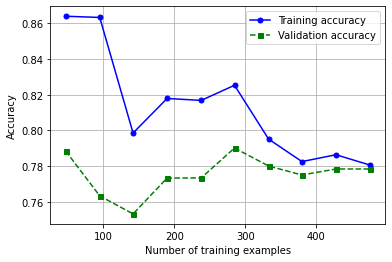

In [ ]:
train_mean = np.mean(train_scores, axis=1) 
test_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training accuracy')

plt.plot(train_sizes, test_mean,  color='green', linestyle='--',  marker='s', markersize=5,label='Validation accuracy')

plt.grid() 
plt.xlabel('Number of training examples') 
plt.ylabel('Accuracy') 

plt.legend()
plt.show()




## Addressing over- and underfitting with validation curve

In [ ]:
from sklearn.model_selection import validation_curve 
param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0] 
train_scores, test_scores = validation_curve( 
      estimator=pipe_lr,  param_name='logisticregression__C', param_range=param_range,  cv=10) 

__https://www.kaggle.com/matteista/telco-customer-churn-analysis-and-prediction/data